### Transformation
---
- transforms and feds the transformed `model_histories` to a visualisation pipe, that saves the visualised model performances. 

In [34]:
import sys

import pandas as pd
import sklearn as sk
import tensorflow as tf
import matplotlib.pyplot as plt 
import seaborn as sns 
import keras
import os
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")
# Set the style to whitegrid
sns.set_style("whitegrid")

# Change global font to Avenir
plt.rcParams['font.family'] = 'Avenir'
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-14.0-arm64-arm-64bit
Tensor Flow Version: 2.13.0
Keras Version: 2.13.1

Python 3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:41:52) [Clang 15.0.7 ]
Pandas 2.1.1
Scikit-Learn 1.3.1
GPU is available


In [40]:
path_to_history = './modeling-data-c51/'

In [45]:
#model_list = ['InceptionV3', 'Xception', 'InceptionResNetV2' ]
model_list = ['InceptionV3', 'VGG16', 'VGG19', 'EfficientNetV2S', 'Xception', 'InceptionResNetV2' ]

In [46]:
def rm_macos_cache(mlist):
    try:
        mlist.remove('.DS_Store')
        return mlist
    except:
        return mlist

for model in model_list:
    print(rm_macos_cache(os.listdir(os.path.join(path_to_history, model))))
    

['InceptionV3_c51.log', 'InceptionV3_configuration.pickle', 'InceptionV3.keras', 'InceptionV3_c51.keras', 'InceptionV3_c51.txt', 'InceptionV3_c51']
['VGG16_c51.keras', 'VGG16.keras', 'VGG16_c51.log', 'VGG16_configuration.pickle', 'VGG16_c51']
['VGG19_c51', 'VGG19.keras', 'VGG19_c51.log', 'VGG19_c51.keras', 'VGG19_configuration.pickle']
['EfficientNetV2S_c51.log', 'EfficientNetV2S_c51.keras', 'EfficientNetV2S_configuration.pickle', 'EfficientNetV2S.keras', 'EfficientNetV2S_c51']
['Xception_c51.log', 'Xception_c51', 'Xception_c51.keras', 'Xception_configuration.pickle', 'Xception.keras']
['InceptionResNetV2_c51.log', 'InceptionResNetV2_c51', 'InceptionResNetV2_c51.keras', 'InceptionResNetV2.keras', 'InceptionResNetV2_configuration.pickle']


### Loading Model Histories and Configurations

In [53]:
! ls modeling-data-c51/InceptionV3/InceptionV3_configuration.pickle

modeling-data-c51/InceptionV3/InceptionV3_configuration.pickle


In [59]:
# load model_histories
model_histories = {}
for model in model_list:
    with open(os.path.join(path_to_history, model,model+"_configuration.pickle"), 'rb') as f:
        model_histories[model] = pickle.load(f)
        
model_histories

{'InceptionV3': {'InceptionV3': {'optimizer': 'adam',
   'loss_function': 'categorical_crossentropy',
   'metrics': ['accuracy', 'AUC']},
  'History': {'loss': [4.283143043518066,
    3.0737948417663574,
    2.7689616680145264,
    2.525144338607788,
    2.463182210922241,
    2.284956932067871,
    2.2694180011749268,
    2.1303305625915527,
    2.091794490814209,
    2.0718729496002197,
    2.0406484603881836,
    1.9776653051376343,
    1.9419281482696533,
    1.9020955562591553,
    1.8680436611175537,
    1.814260482788086,
    1.8333392143249512,
    1.823008418083191],
   'accuracy': [0.21485373377799988,
    0.3567168414592743,
    0.39591026306152344,
    0.43893781304359436,
    0.44731611013412476,
    0.475859135389328,
    0.4740130603313446,
    0.49559783935546875,
    0.5038341283798218,
    0.5007100105285645,
    0.5049701929092407,
    0.5154785513877869,
    0.5262709259986877,
    0.5252768993377686,
    0.5221527814865112,
    0.5359272956848145,
    0.53322917222

In [60]:
history_dfs = {}
for model in model_list:
    history_dfs[model] = pd.DataFrame(model_histories[model]['History'])

In [61]:
history_dfs.keys()

dict_keys(['InceptionV3', 'VGG16', 'VGG19', 'EfficientNetV2S', 'Xception', 'InceptionResNetV2'])

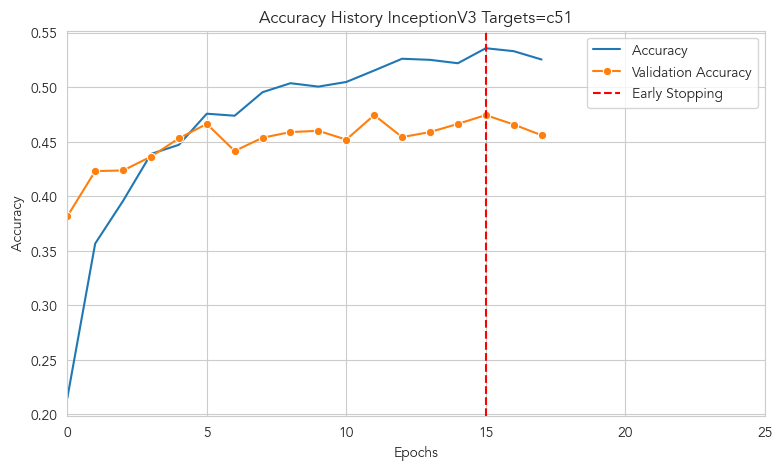

/var/folders/5r/pnlff12n2d55g65_tnn3b1pw0000gn/T/ipykernel_25753/2745751595.py:51: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, val_auc_values, 'ro-', label='Validation AUC', color='dodgerblue')


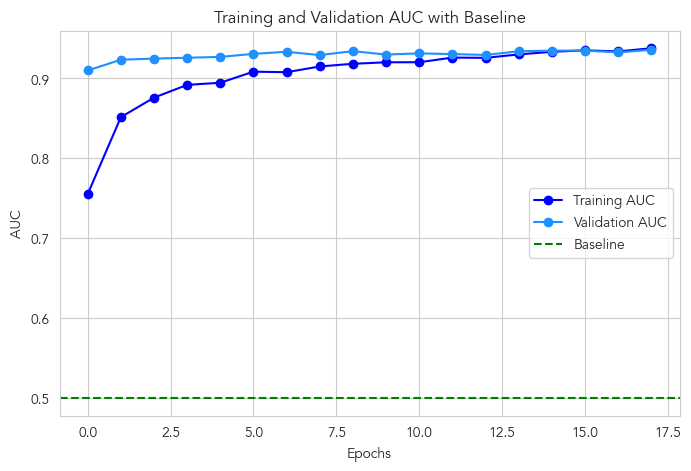

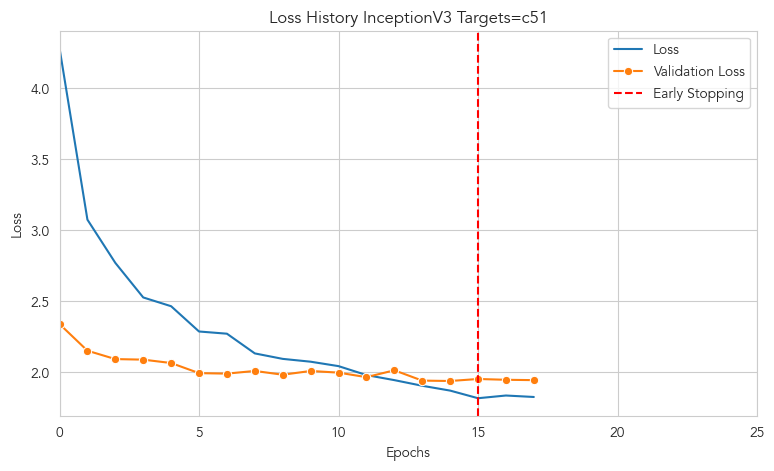

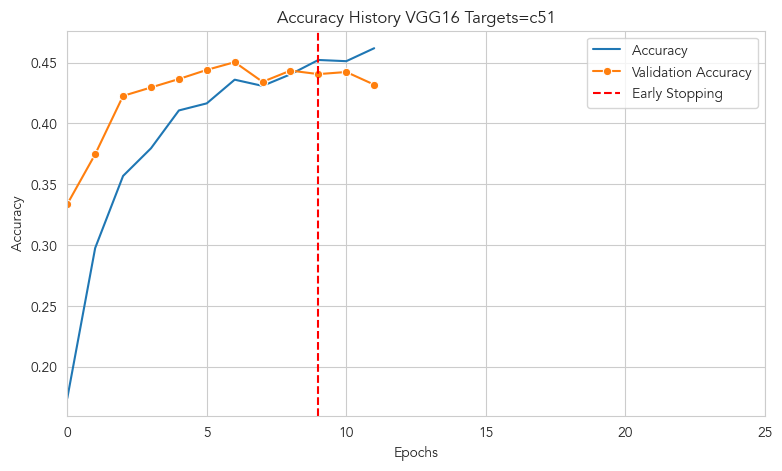

/var/folders/5r/pnlff12n2d55g65_tnn3b1pw0000gn/T/ipykernel_25753/2745751595.py:51: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, val_auc_values, 'ro-', label='Validation AUC', color='dodgerblue')


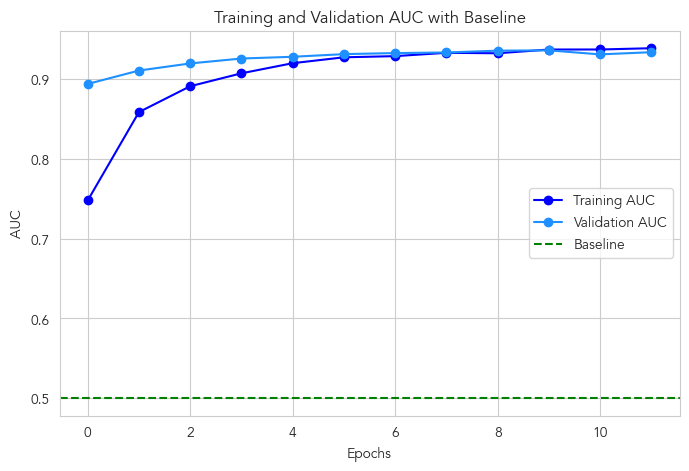

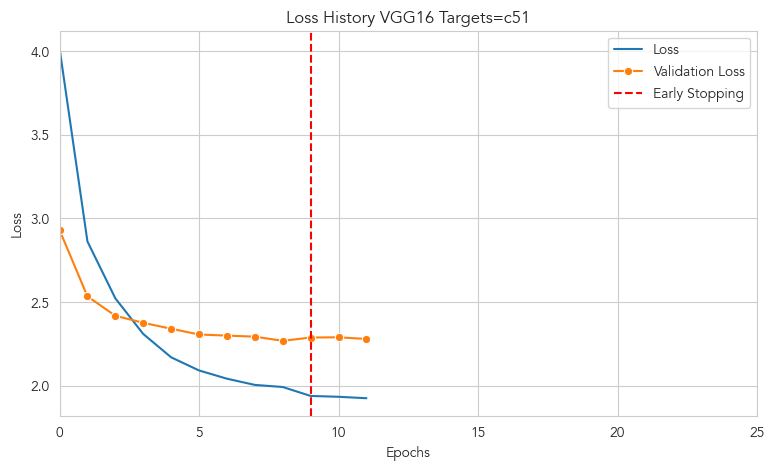

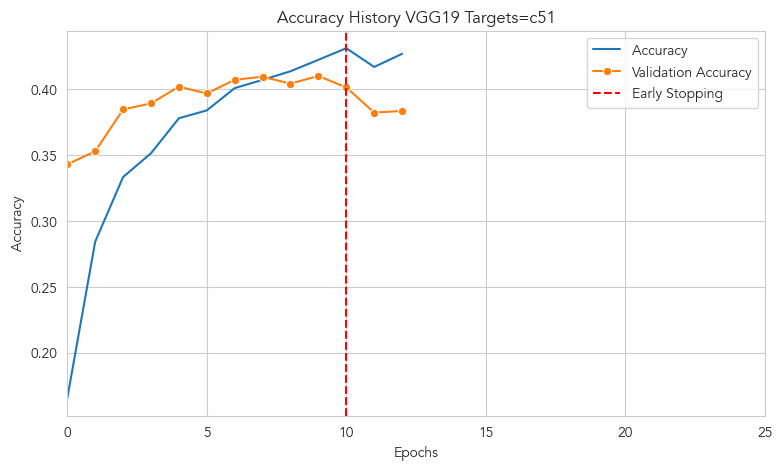

/var/folders/5r/pnlff12n2d55g65_tnn3b1pw0000gn/T/ipykernel_25753/2745751595.py:51: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, val_auc_values, 'ro-', label='Validation AUC', color='dodgerblue')


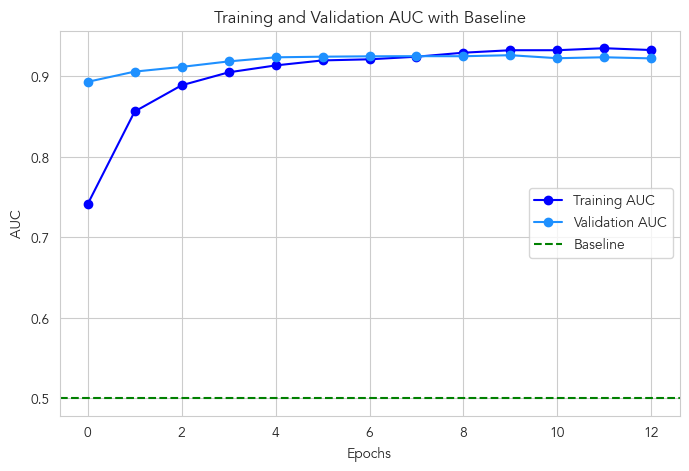

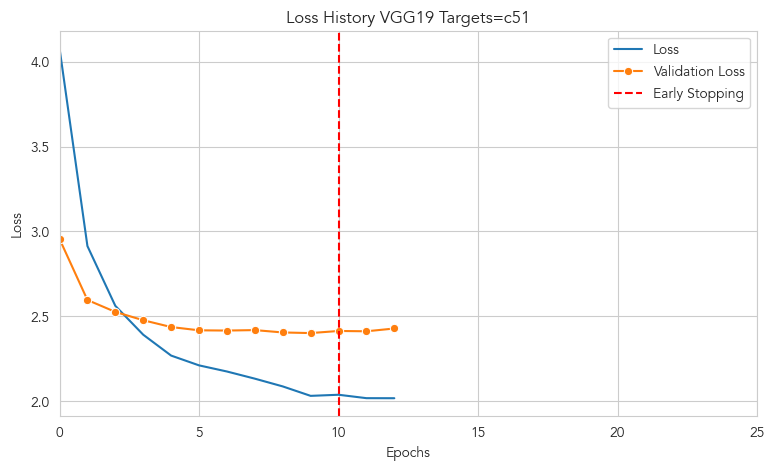

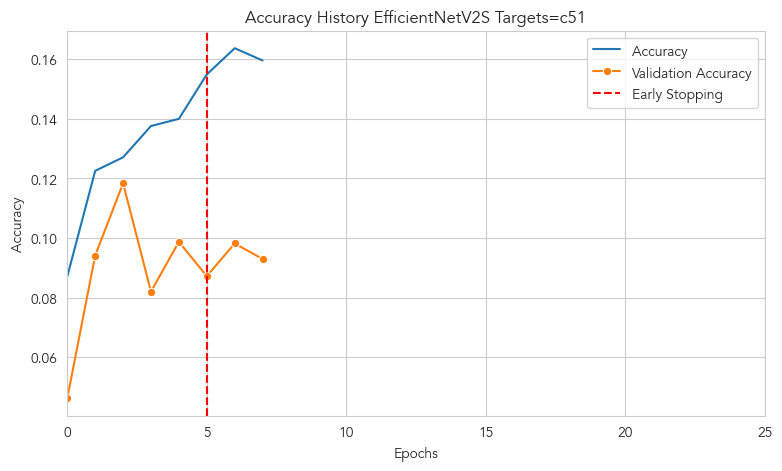

/var/folders/5r/pnlff12n2d55g65_tnn3b1pw0000gn/T/ipykernel_25753/2745751595.py:51: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, val_auc_values, 'ro-', label='Validation AUC', color='dodgerblue')


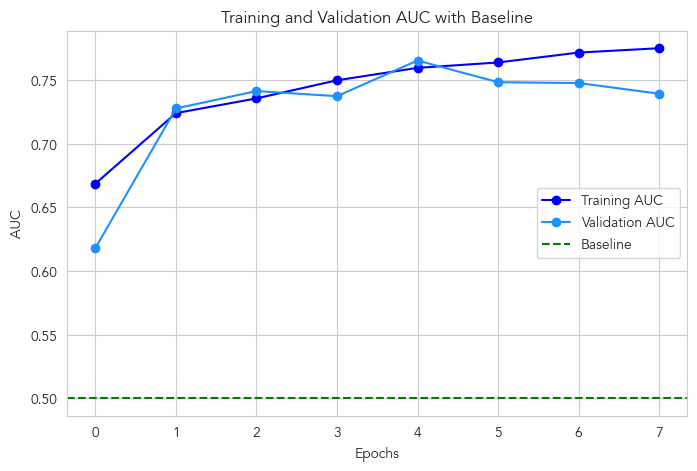

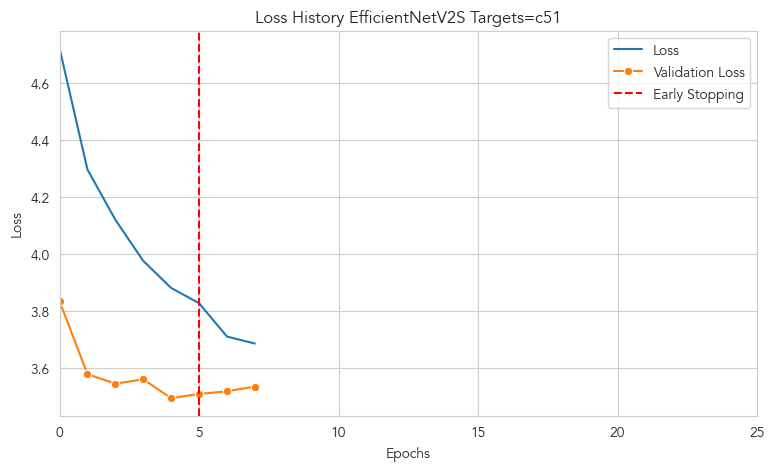

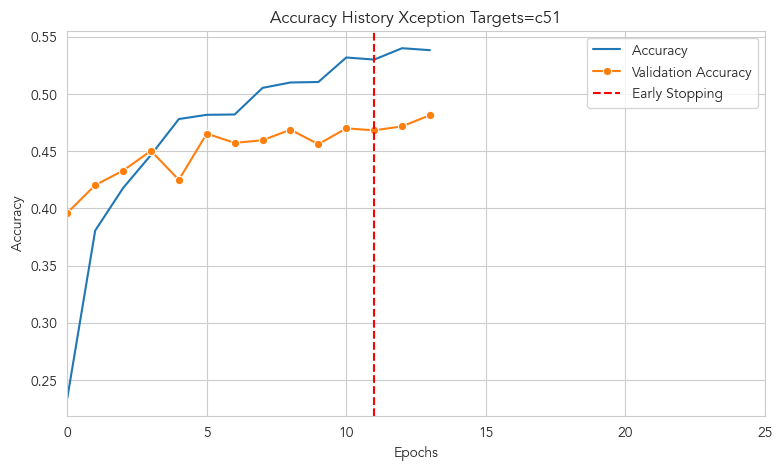

/var/folders/5r/pnlff12n2d55g65_tnn3b1pw0000gn/T/ipykernel_25753/2745751595.py:51: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, val_auc_values, 'ro-', label='Validation AUC', color='dodgerblue')


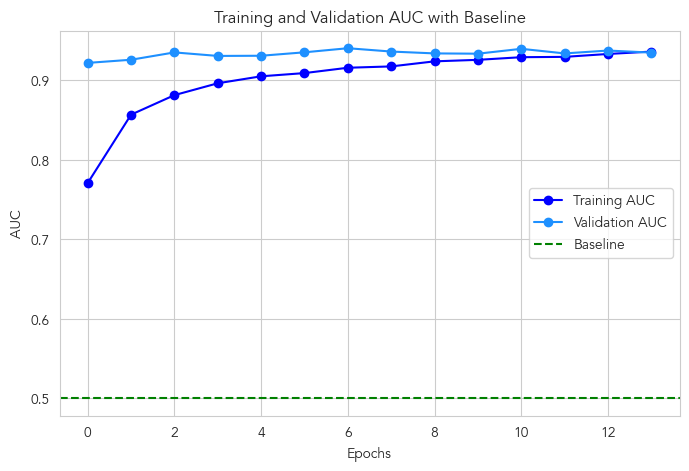

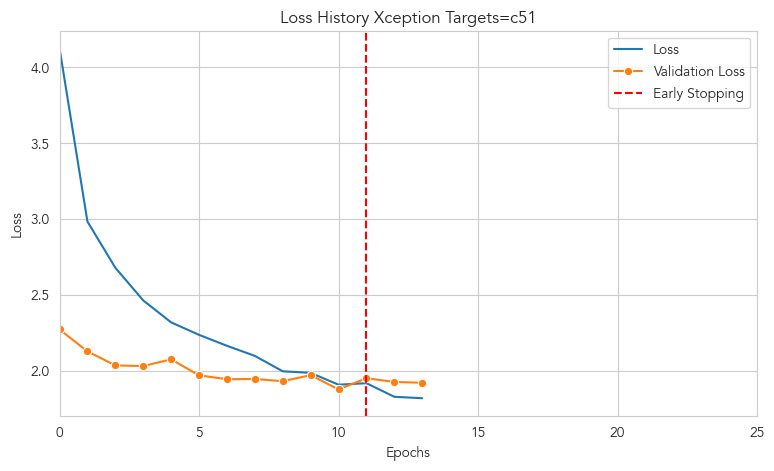

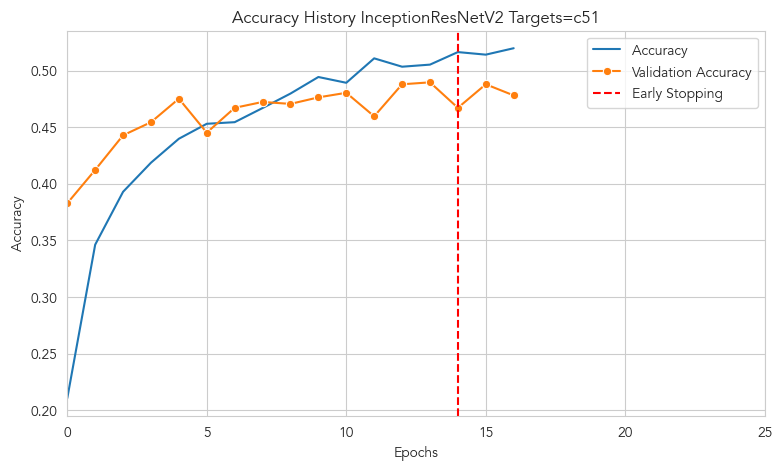

/var/folders/5r/pnlff12n2d55g65_tnn3b1pw0000gn/T/ipykernel_25753/2745751595.py:51: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, val_auc_values, 'ro-', label='Validation AUC', color='dodgerblue')


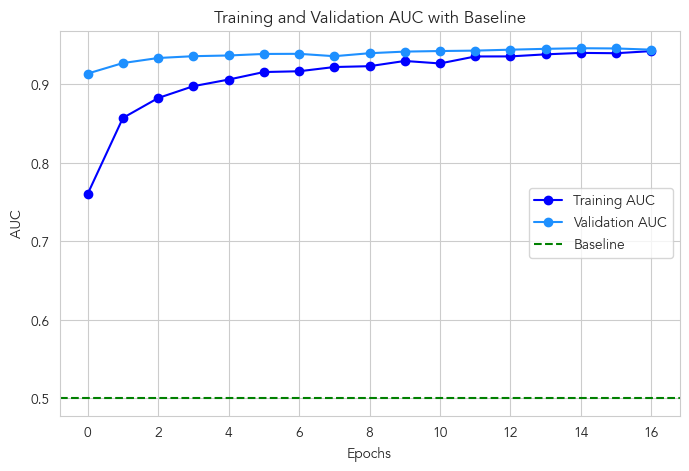

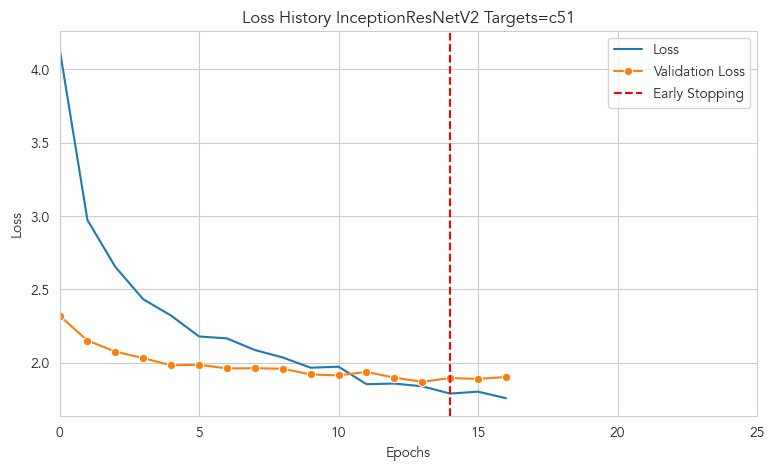

In [63]:
# Metric HISTORY
dictionary_of_metrics = {"Accuracy":["accuracy","val_accuracy"],
                         "AUC": ["auc","val_auc"],
                         "Loss": ["loss", "val_loss"],
                        }

classes = "c51"
plots_path = f"modeling-data-{classes}/performance_analysis/"
os.makedirs(plots_path, exist_ok=True)


for model in model_list:

    for metric, cols in zip(dictionary_of_metrics.keys(), dictionary_of_metrics.values()):
        
        metric_path = os.path.join(plots_path, metric)
        os.makedirs(metric_path, exist_ok=True)
        norm_metric, val_metric = cols
        
        epochs = range(history_dfs[model].shape[0])
        
        if not metric == 'AUC':

            # Visualize the loss history with a cut off line at the end of the line
            plt.figure(figsize=(9,5))
            sns.lineplot(x=range(history_dfs[model].shape[0]), y=norm_metric, data=history_dfs[model], label=f"{metric}")
            plt.xlim(0,25)
            plt.legend()

            # Visualize the accuracy history
            sns.lineplot(x=range(history_dfs[model].shape[0]), y=val_metric, data=history_dfs[model], marker='o', label=f'Validation {metric}')
            plt.axvline(x=history_dfs[model].shape[0]-3, color='red', linestyle='--', label='Early Stopping')

            plt.title(f"{metric} History {model} Targets={classes}")
            plt.xlabel("Epochs")
            plt.ylabel(f"{metric}")
            plt.legend(loc='best')
            plt.savefig(os.path.join(metric_path, f"{model}_{classes}.png"))
            plt.show()
            
        else:
            # Baseline value
            baseline = 0.5
            
            auc_values = history_dfs[model]['auc']
            val_auc_values = history_dfs[model]['val_auc']

            # Plotting the AUC, validation AUC, and baseline
            plt.figure(figsize=(8, 5))
            plt.plot(epochs, auc_values, 'bo-', label='Training AUC')
            plt.plot(epochs, val_auc_values, 'ro-', label='Validation AUC', color='dodgerblue')
            plt.axhline(y=baseline, color='g', linestyle='--', label='Baseline')
            plt.title('Training and Validation AUC with Baseline')
            plt.xlabel('Epochs')
            plt.ylabel('AUC')
            plt.legend()
            plt.grid(True)
            plt.savefig(os.path.join(metric_path, f"{model}_{classes}.png"))
            plt.show()
                

### For Individual Testing

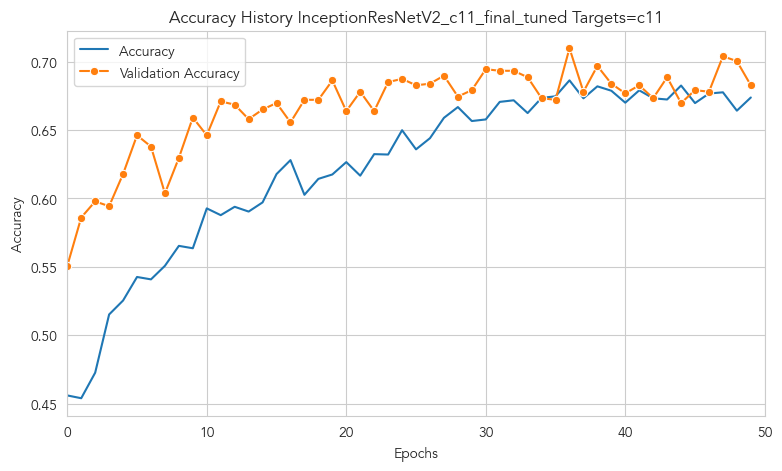

/var/folders/5r/pnlff12n2d55g65_tnn3b1pw0000gn/T/ipykernel_25753/1887291373.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, val_auc_values, 'ro-', label='Validation AUC', color='dodgerblue')


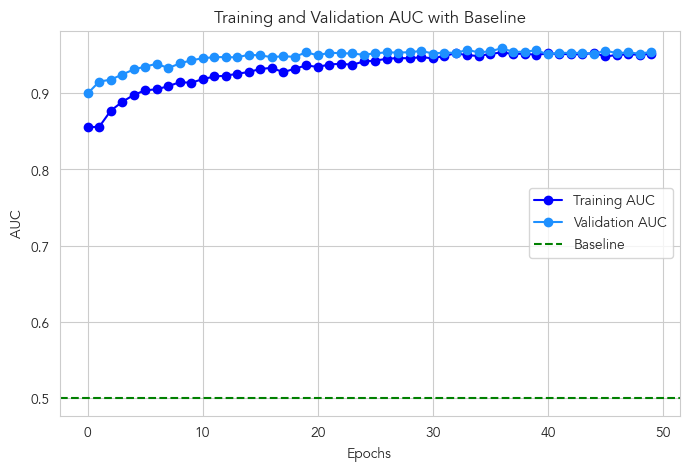

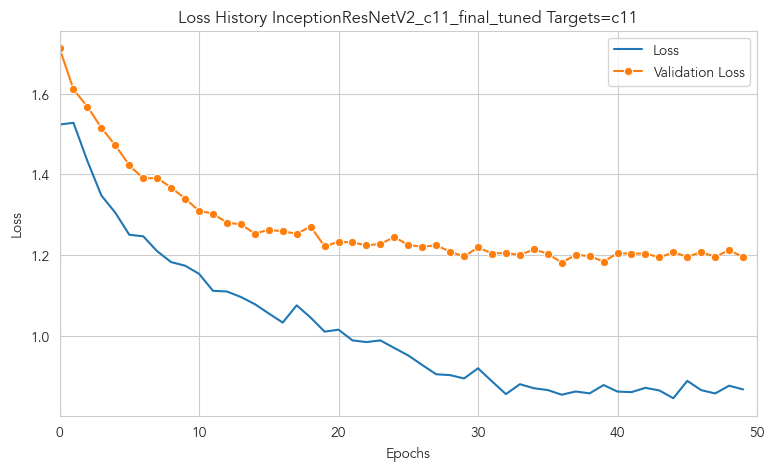

In [74]:
# Metric HISTORY
dictionary_of_metrics = {"Accuracy":["accuracy","val_accuracy"],
                         "AUC": ["auc","val_auc"],
                         "Loss": ["loss", "val_loss"],
                        }

classes = "c11"
log_path = "./modeling-data-c11/InceptionResNetV2_c11_final_tuned"
model = "InceptionResNetV2_c11_final_tuned"
# os.makedirs(plots_path, exist_ok=True)

history = pd.read_csv("./modeling-data-c11/InceptionResNetV2_c11_final_tuned/InceptionResNetV2_c11.csv")




for metric, cols in zip(dictionary_of_metrics.keys(), dictionary_of_metrics.values()):

    metric_path = os.path.join(plots_path, metric)
    os.makedirs(metric_path, exist_ok=True)
    norm_metric, val_metric = cols

    epochs = range(history.shape[0])

    if not metric == 'AUC':

        # Visualize the loss history with a cut off line at the end of the line
        plt.figure(figsize=(9,5))
        sns.lineplot(x=range(history.shape[0]), y=norm_metric, data=history, label=f"{metric}")
        plt.xlim(0,history.shape[0])
        plt.legend()

        # Visualize the accuracy history
        sns.lineplot(x=range(history.shape[0]), y=val_metric, data=history, marker='o', label=f'Validation {metric}')
        #plt.axvline(x=history.shape[0]-2, color='red', linestyle='--', label='Early Stopping')

        plt.title(f"{metric} History {model} Targets={classes}")
        plt.xlabel("Epochs")
        plt.ylabel(f"{metric}")
        plt.legend(loc='best')
        plt.savefig(os.path.join(log_path, f"{model}_{classes}_{metric}.png"))
        plt.show()

    else:
        # Baseline value
        baseline = 0.5

        auc_values = history['auc']
        val_auc_values = history['val_auc']

        # Plotting the AUC, validation AUC, and baseline
        plt.figure(figsize=(8, 5))
        plt.plot(epochs, auc_values, 'bo-', label='Training AUC')
        plt.plot(epochs, val_auc_values, 'ro-', label='Validation AUC', color='dodgerblue')
        plt.axhline(y=baseline, color='g', linestyle='--', label='Baseline')
        plt.title('Training and Validation AUC with Baseline')
        plt.xlabel('Epochs')
        plt.ylabel('AUC')
        plt.legend()
        plt.grid(True)
        plt.savefig(os.path.join(log_path, f"{model}_{classes}_{metric}.png"))
        plt.show()


### Following Cells
---
- Confusion Matrix with Validation Data 
- Intermediate Layer Visualisations

In [ ]:
 # Visualize the loss history with a cut off line at the end of the line
        